In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from tqdm import tqdm
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from tqdm import tqdm

In [2]:
df=pd.read_csv("/kaggle/input/digital-currency-time-series/dc.csv", parse_dates=['Unnamed: 0'], index_col='Unnamed: 0')
df = df.sort_index()
df.head()

,open_SAR,open_USD,high_SAR,high_USD,low_SAR,low_USD,close_SAR,close_USD,volume
2018-05-07,36232.689408,9661.02,36340.138368,9689.67,34432.422400,9181.00,35122.496000,9365.00,33787
2018-05-08,35122.496000,9365.00,35537.665280,9475.70,33980.649216,9060.54,34457.025024,9187.56,25533
2018-05-09,34421.171200,9178.00,35216.256000,9390.00,33622.336000,8965.00,34916.224000,9310.00,25673
2018-05-10,34916.224000,9310.00,35235.458048,9395.12,33641.088000,8970.00,33761.850880,9002.20,25055
2018-05-11,33761.888384,9002.21,33816.606720,9016.80,31282.086400,8341.00,31503.360000,8400.00,48227


In [3]:
df.describe()

,open_SAR,open_USD,high_SAR,high_USD,low_SAR,low_USD,close_SAR,close_USD,volume
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,34825.322255,9285.762120,35789.618165,9542.880270,33796.329057,9011.393200,34917.483572,9310.335850,53100.498000
std,21728.028028,5793.522832,22785.946842,6075.604427,20565.410145,5483.524463,21928.280072,5846.917681,35329.832031
min,12045.197184,3211.710000,12288.185600,3276.500000,11837.237504,3156.260000,12045.234688,3211.720000,5743.000000
25%,24254.558752,6467.192500,24686.089152,6582.255000,23721.336256,6325.015000,24252.946080,6466.762500,30045.750000
50%,30714.632128,8189.695000,31321.953152,8351.630000,30010.869568,8002.045000,30713.263232,8189.330000,43795.500000
75%,38317.311744,10216.860000,39077.527200,10419.562500,37158.878816,9907.977500,38329.725568,10220.170000,64909.250000
max,152217.334784,40586.960000,157329.280000,41950.000000,145215.488000,38720.000000,152201.770624,40582.810000,402201.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 2018-05-07 to 2021-01-30
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   open_SAR   1000 non-null   float64
 1   open_USD   1000 non-null   float64
 2   high_SAR   1000 non-null   float64
 3   high_USD   1000 non-null   float64
 4   low_SAR    1000 non-null   float64
 5   low_USD    1000 non-null   float64
 6   close_SAR  1000 non-null   float64
 7   close_USD  1000 non-null   float64
 8   volume     1000 non-null   int64  
dtypes: float64(8), int64(1)
memory usage: 78.1+ KB


In [5]:
df.shape

(1000, 9)

In [6]:
df.isnull().sum()

open_SAR     0
open_USD     0
high_SAR     0
high_USD     0
low_SAR      0
low_USD      0
close_SAR    0
close_USD    0
volume       0
dtype: int64

In [7]:
df.duplicated().sum()

0

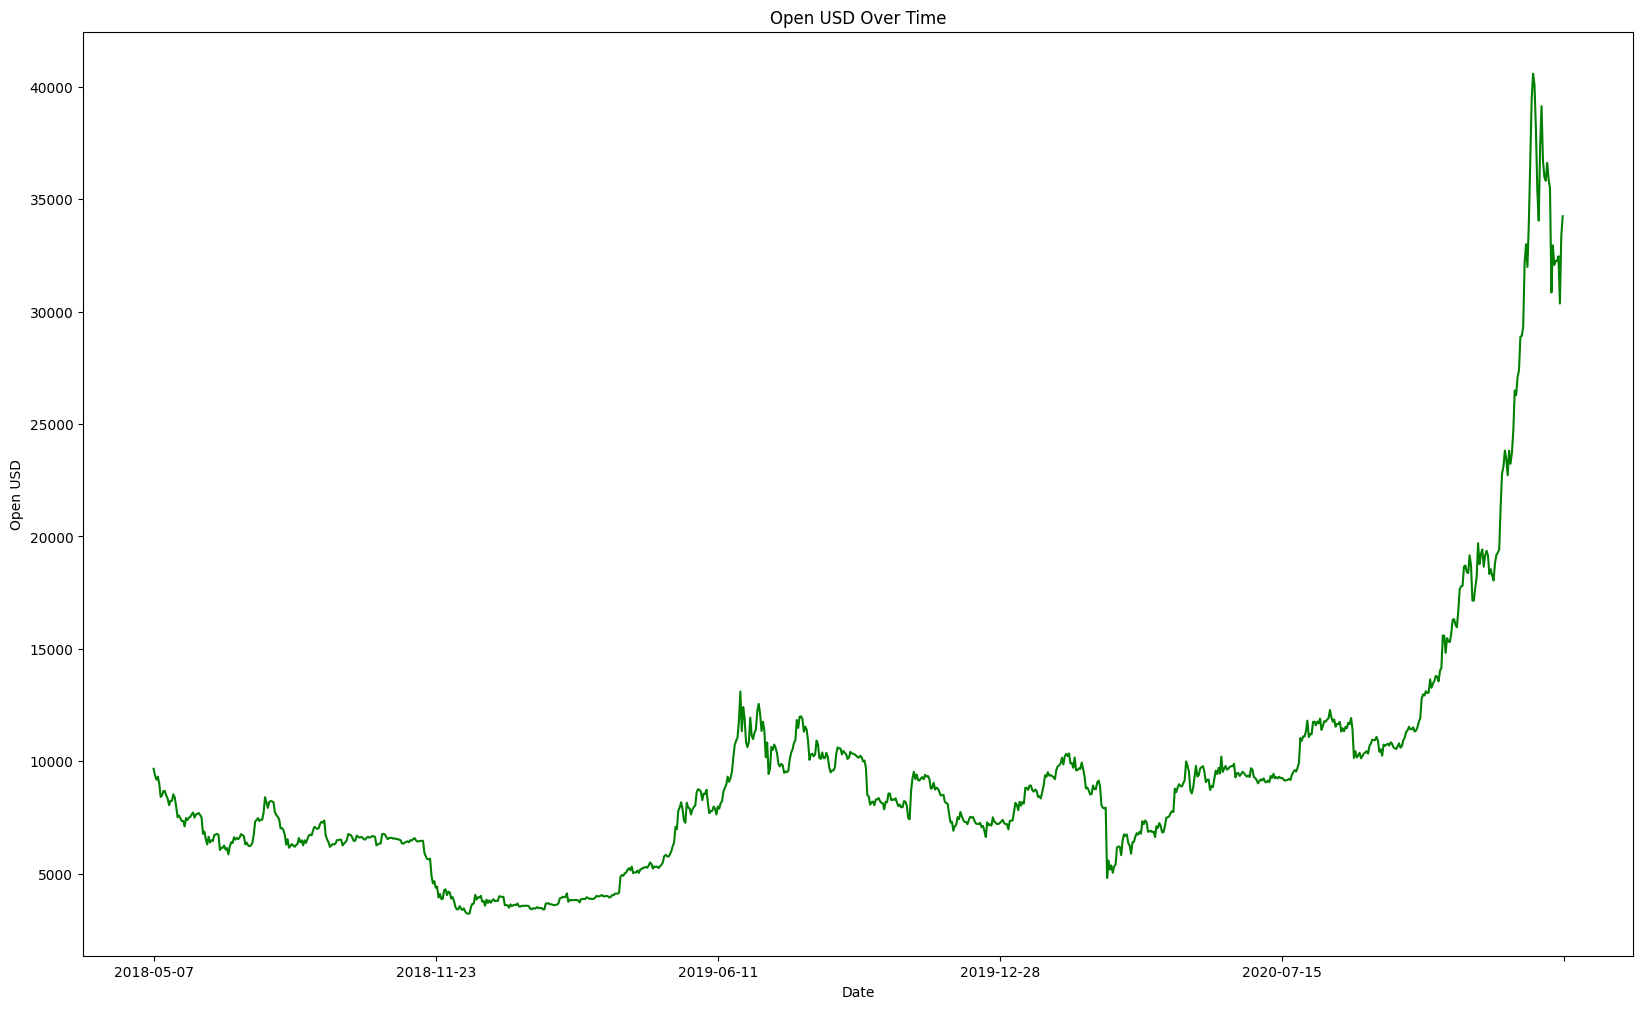

In [8]:
plt.figure(figsize=(20, 12))
df['open_USD'].plot(color='green')
plt.title('Open USD Over Time')
plt.xlabel('Date')
plt.ylabel('Open USD')
plt.show()

In [9]:
days = 5
sequence = []
target = []

for i in range(days, len(df)):
    sequence.append(df['open_USD'].values[i-days:i])
    target.append(df['open_USD'].values[i])

sequence = np.array(sequence)
target = np.array(target)


In [10]:
x_train, x_test, y_train, y_test = train_test_split(sequence, target, test_size=0.4, shuffle=False)

In [11]:
scaler_x = MinMaxScaler()
x_train_scaled = scaler_x.fit_transform(x_train)
x_test_scaled = scaler_x.transform(x_test)
scaler_y = MinMaxScaler()
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1))

In [12]:
regressors = {
    'LinearRegression': LinearRegression(),
    'RandomForest': RandomForestRegressor(n_estimators=100, random_state=42),
    'SupportVectorMachine': SVR(kernel='rbf', C=100, gamma='auto', epsilon=0.1),
    'KNN': KNeighborsRegressor(n_neighbors=5),
    'DecisionTree': DecisionTreeRegressor(random_state=42)
}

model_names = []
evaluation_metrics = []
predicted_outputs = []

for model_name, reg in tqdm(regressors.items(), desc="Training models"):
    reg.fit(x_train_scaled, y_train_scaled)
    predictions = reg.predict(x_test_scaled)
    predicted_outputs.append(predictions)

    metrics = {
        'Model': model_name,
        'MSE': mean_squared_error(y_test_scaled, predictions),
        'R2_Score': r2_score(y_test_scaled, predictions),
        'MAE': mean_absolute_error(y_test_scaled, predictions)
    }

    evaluation_metrics.append(metrics)

results_df = pd.DataFrame(evaluation_metrics)


print("\nModel Performance Comparison:")
print(results_df)

Training models:   0%|          | 0/5 [00:00<?, ?it/s]/tmp/ipykernel_13/1479163001.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  reg.fit(x_train_scaled, y_train_scaled)
Training models:  40%|████      | 2/5 [00:00<00:00,  5.79it/s]/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
Training models: 100%|██████████| 5/5 [00:00<00:00, 13.67it/s]


Model Performance Comparison:
                  Model       MSE  R2_Score       MAE
0      LinearRegression  0.004734  0.991699  0.037039
1          RandomForest  0.563942  0.011138  0.332126
2  SupportVectorMachine  0.673856 -0.181594  0.348622
3                   KNN  0.539402  0.054168  0.324700
4          DecisionTree  0.573328 -0.005320  0.346200


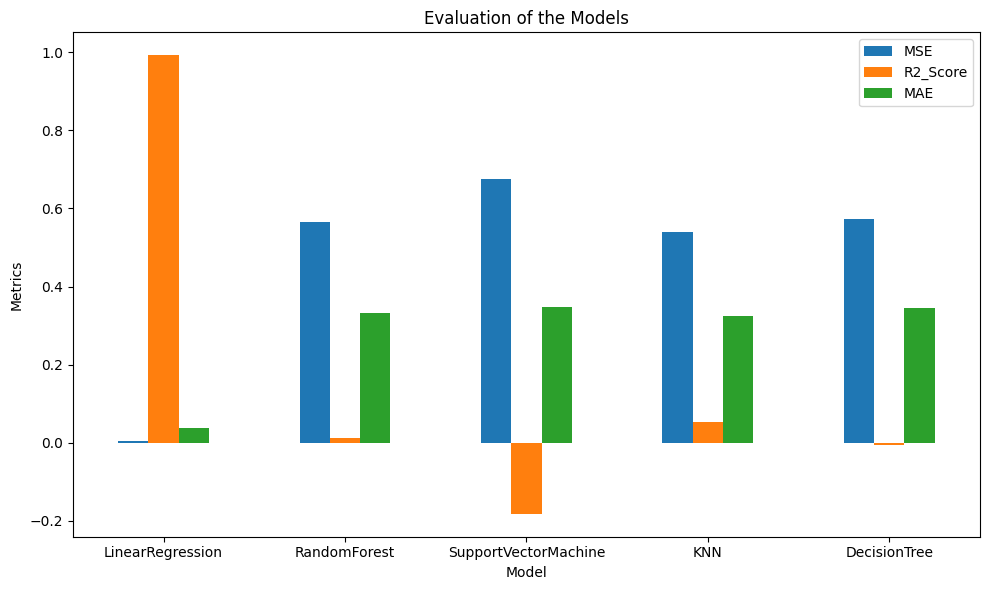

In [13]:
results_df.set_index('Model').plot(kind='bar', figsize=(10,6))
plt.title('Evaluation of the Models')
plt.xlabel('Model')
plt.ylabel('Metrics')
plt.xticks(rotation=0)
plt.legend(loc='upper right')
plt.grid(False)
plt.tight_layout()
plt.show()

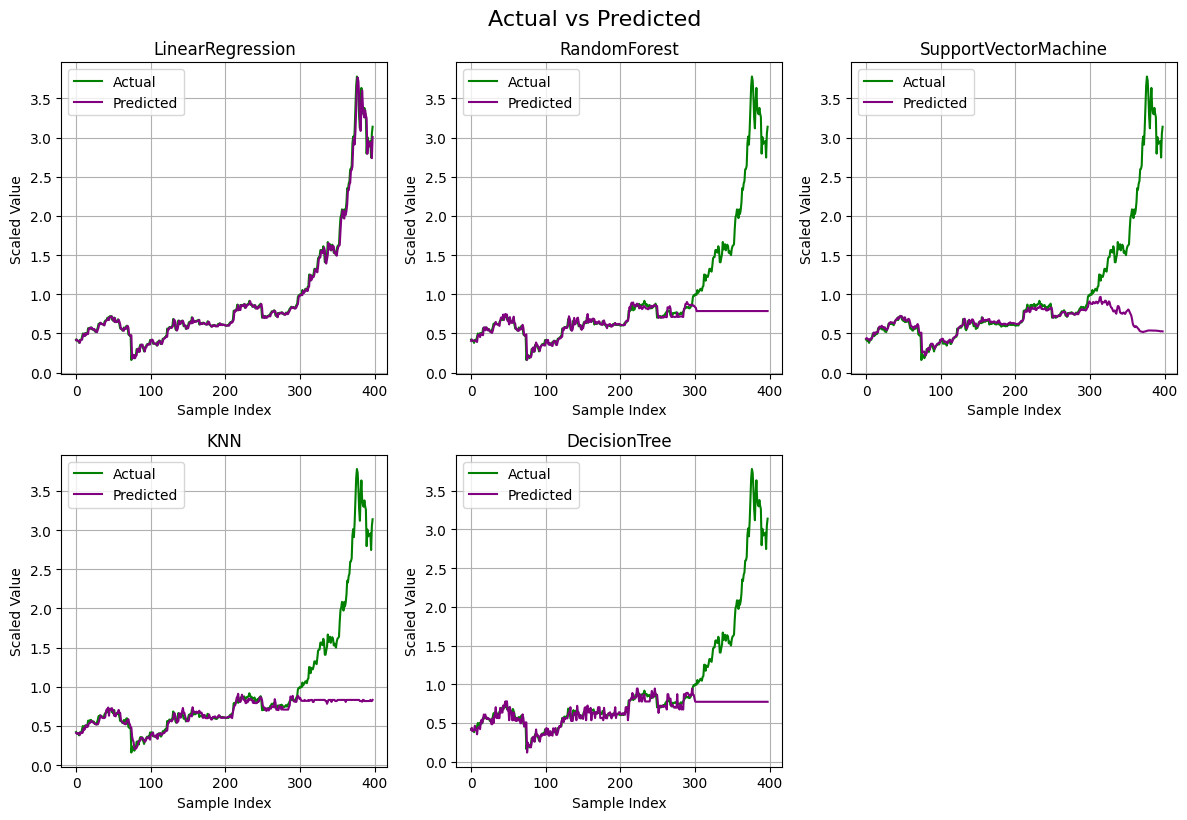

In [14]:
import matplotlib.pyplot as plt

model_count = len(regressors)
columns = 3
rows = (model_count + 1) // columns

plt.figure(figsize=(12, rows * 4))

for i, (model_label, prediction) in enumerate(zip(regressors.keys(), predicted_outputs)):
    plt.subplot(rows, columns, i + 1)
    plt.plot(y_test_scaled, label='Actual', color='green')
    plt.plot(prediction, label='Predicted', color='purple')
    plt.title(f'{model_label}')
    plt.xlabel('Sample Index')
    plt.ylabel('Scaled Value')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.suptitle('Actual vs Predicted', fontsize=16, y=1.02)
plt.show()